## 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [5]:
df = pd.read_csv('ch4_scores400.csv')
df.head()

,score
0,76
1,55
2,80
3,80
4,74


In [8]:
scores = np.array(df['score'])
scores[:5]

array([76, 55, 80, 80, 74], dtype=int64)

In [9]:
# 모집단의 평균, 분산

p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

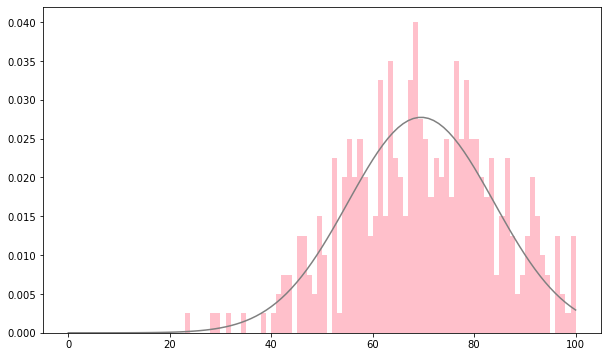

In [14]:
# 모집단의 분포 살펴보기
# 정규분포를 이룬다고 가정하여 추정하기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))

ax.plot(xs, rv.pdf(xs), color = 'gray')
ax.hist(scores, bins = 100, range =(0,100), density = True, color = 'pink')

plt.show()

### 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 함
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 불편성임
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있음


In [15]:
# 무작위추출한 20명의 표본 추출

np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [18]:
# 무작위추출한 20명의 표본을 1만개 추출

np.random.seed(1111)
n_sample = 10000
samples = np.random.choice(scores, (n_sample, n))

In [30]:
# 5개의 표본을 뽑아 평균 확인해보기

for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean}')

1번째 표본평균: 67.0
2번째 표본평균: 72.85
3번째 표본평균: 69.2
4번째 표본평균: 64.45
5번째 표본평균: 72.65


In [31]:
# 표본크기가 20인 1만개 표본의 기댓값 확인해보기

sample_means = np.mean(samples, axis = 1)
np.mean(sample_means)

69.538

In [32]:
# 표본 크기 n이 100만개일 때 기댓값 확인해보기

samples2 = np.random.choice(scores, int(1e6))
np.mean(samples2)

69.547

In [34]:
# 5개의 표본을 뽑아 분산 확인해보기

for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [38]:
# 표본크기가 20인 1만개 표본의 분산 확인해보기

sample_vars = np.var(samples, axis = 1)
np.mean(sample_vars)

196.344

In [40]:
# 표본크기가 20인 1만개 표본의 '불편'분산 확인해보기

samples_u_vars = np.var(samples, axis = 1, ddof = 1)
np.mean(samples_u_vars)

206.678

In [41]:
# 표본 크기 n이 100만개일 때 '불편'분산 확인해보기

np.var(np.random.choice(scores, int(1e6)), ddof = 1)

206.657

In [43]:
u_var = np.var(sample, ddof = 1)
u_var

158.253

### 구간추정

- 구간추정을 100번 하더라도 모평균은 실제 값이 하나로 정해져있기 때문에 
- 신뢰구간 95%의 뜻은 <b>'동일한 방법으로 수차례 표본추출하여 구간추정을 하면 그 중 95%의 구간추정에는 모평균이 포함되어 있다'</b>임

In [47]:
%precision 3

'%.3f'

In [48]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])

# 모집단의 평균, 분산
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

In [49]:
np.random.seed(0)


# 표본 수가 20개
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)


# 표본 집단 수가 10000개
samples = np.random.choice(scores, (10000, n))


# 표본 수가 1000000개
samples2 = np.random.choice(scores, int(1e6))

In [50]:
from scipy import stats

rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(p_var/n)

lcl, ucl

(64.100, 76.700)

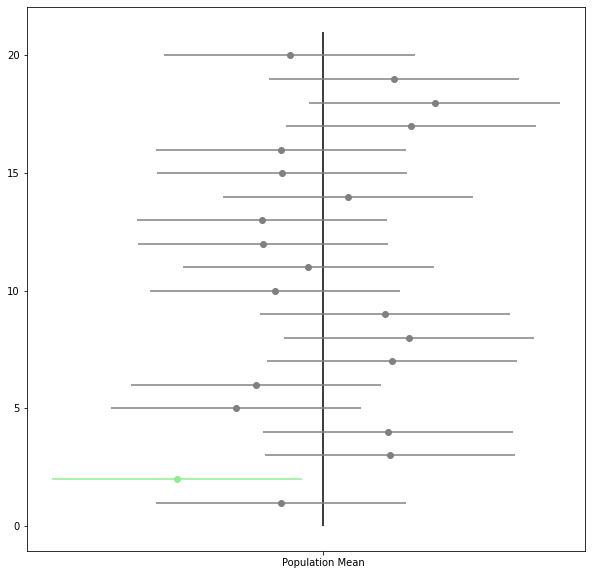

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21, color = 'black')

for i in range(n_samples):
    sample_ = samples[i+20]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025)*np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975)*np.sqrt(p_var/n)
    
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color = 'gray')
        ax.hlines(n_samples-i, lcl, ucl, color = 'gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color = 'lightgreen')
        ax.hlines(n_samples-i, lcl, ucl, color = 'lightgreen')
    
    ax.set_xticks([p_mean])
    ax.set_xticklabels(['Population Mean'])

plt.show()

- 20번 중 1번 모평균을 포함하지 않는 구간추정이 수행됨 -> 95% 신뢰구간의 이미지임

In [52]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    
    if lcl <= p_mean <= ucl:
        cnt += 1
        
cnt / len(samples)

0.949

- 신뢰구간의 약 95%가 모평균을 포함하고 있음

#### 정규분포의 모분산 구간추정
- 모집단으로 정규분포를 가정하고, 모평균은 모르는 상태일 때, 
Y = (n-1)s^2/σ^2  ~ X^2(n-1)

In [53]:
# 1만개의 X 표본데이터를 가지고  Y의 표본 데이터 생성

samples_u_vars = np.var(samples, axis = 1, ddof = 1)  # 불편분산

sample_y = samples_u_vars * (n-1) / p_var
sample_y

array([17.501, 22.143, 21.701, ..., 24.744, 14.681, 17.892])

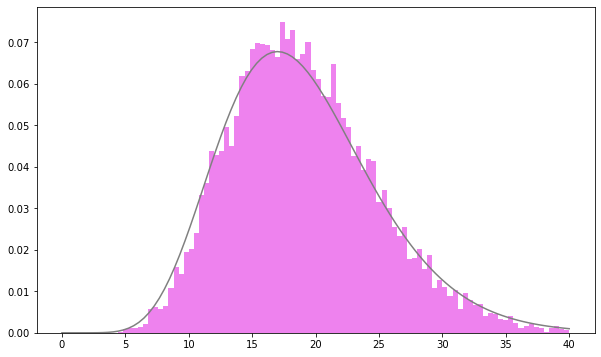

In [54]:
# Y의 표본 데이터 히스토그램, X^2(n-1) 밀도함수 그리기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)


n = 20
xs = np.linspace(0, 40, 100)

# X^2(n-1) 밀도함수 그리기
rv = stats.chi2(df = n-1)
ax.plot(xs, rv.pdf(xs), color = 'gray')

# Y의 표본 데이터 히스토그램
hist, _, _ = ax.hist(sample_y, bins = 100, range = (0,40), density = True, color = 'violet')

In [55]:
# 모분산의 신뢰구간 구하기

u_var = np.var(sample, ddof = 1)
rv = stats.chi2(df = n-1)


lcl = (n-1) * u_var / rv.isf(0.025)
ucl = (n-1) * u_var / rv.isf(0.975)

lcl, ucl

(91.525, 337.596)

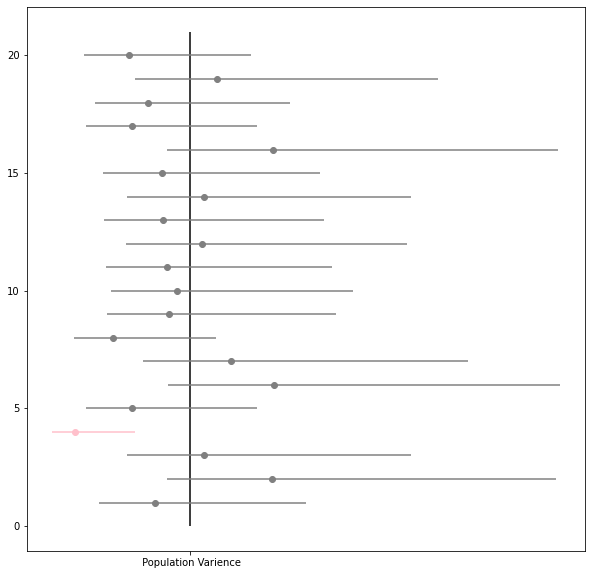

In [56]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

n = 20

rv = stats.chi2(df = n-1)

ax.vlines(p_var, 0, 21, color = 'black')

for i in range(20):
    sample_ = samples[20 + i]
    u_var_ = np.var(sample_, ddof = 1)
    
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, 20-i, color = 'gray')
        ax.hlines(20-i, lcl, ucl, color = 'gray')
    else:
        ax.scatter(u_var_, 20-i, color = 'pink')
        ax.hlines(20-i, lcl, ucl, color = 'pink')

ax.set_xticks([p_var])
ax.set_xticklabels([' Population Varience'])

plt.show()

In [57]:
rv = stats.chi2(df = n-1)

cnt = 0

for sample_ in samples:
    u_var_ = np.var(sample_, ddof = 1)
    
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    
    if lcl <= p_var <= ucl:
        cnt += 1
    
cnt / len(samples)

0.962

- 신뢰구간의 약 96%가 모분산을 포함하고 있음을 확인할 수 있음

#### 정규분포의 모평균 구간추정: 모분산을 모르는 경우
- 모분산을 알지 못하는 상황에서는 표준오차를 불편분산을 사용해서 구함

In [58]:
rv = stats.t(df = n-1)

lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(64.512, 76.288)

#### 베르누이분포의 모평균 구간추정

In [59]:
# 자료 불러오기
## 1. 상품 A를 알고 있음, 0. 상품 A를 알지 못함 

enquete_df = pd.read_csv('ch10_enquete.csv')
display(enquete_df.head())


# 데이터프레임 -> 배열화

enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

,known
0,1
1,0
2,1
3,1
4,1


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [62]:
## X ~ Bern(p)

## 평균(p) 구하기 
s_mean = enquete.mean()
print(f'평균(p): {s_mean}')


## 신뢰구간 구하기
rv = stats.norm()

lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean * (1 - s_mean)/len(enquete))
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean * (1 - s_mean)/len(enquete))

lcl, ucl

평균(p): 0.709


(0.681, 0.737)

#### 포아송분포의 모평균 구간추정

In [65]:
# 자료 불러오기
## 사이트에 대한 1시간당 액세스 수가 72시간 분량이 들어있음

n_access_df= pd.read_csv('ch10_access.csv')
display(n_access_df.head())


# 데이터프레임 -> 배열화

n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

,access number
0,10
1,11
2,9
3,9
4,18


array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [69]:
# λ(1시간당 평균 액세스 수) 구하기

s_mean = n_access.mean()
print(f'평균: {s_mean: .3f}')


# 신뢰구간 구하기
rv = stats.norm()

lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

평균:  10.444


(9.698, 11.191)

#### 과제1: 다음 용어를 예를 들어 설명하기

In [86]:
# 모집단 생성

population = np.array(np.random.choice(np.arange(100, 200),2000))
population_mean = np.mean(population)
population_var = np.var(population)
print(f'모집단 평균: {population_mean:.2f}')
print(f'모집단 분산: {population_var:.2f}')

모집단 평균: 149.00
모집단 분산: 825.68


##### 1. 불편성
- 표본으로부터 구한 통계량의 기대치가 추정하려 하는 모수의 실제 값에 같거나 가까워지는 성질

In [106]:
# 표본 생성
sample = np.random.choice(population, (20,20))
sample_mean = np.mean(np.mean(sample, axis = 1))
print(f'표본의 평균:{sample_mean:.2f}')

sample = np.random.choice(population, (200,20))
sample_mean = np.mean(np.mean(sample, axis = 1))
print(f'표본의 평균:{sample_mean:.2f}')

표본의 평균:147.44
표본의 평균:149.28


##### 2. 일치성
- 표본의 수가 늘어날 수록 추정치가 모수에 가까워지려하는 특성

In [114]:
# 표본 생성
sample2 = np.random.choice(population, 500)
sample2_mean = np.mean(sample2)
print(f'표본의 평균: {sample2_mean:.2f}')

sample2 = np.random.choice(population, 5000000)
sample2_mean = np.mean(sample2)
print(f'표본의 평균: {sample2_mean:.2f}')

표본의 평균: 147.85
표본의 평균: 149.01


##### 3. 불편분산:

<img src = '불편분산설명.png' width = 800px>

In [123]:
# 모집단 분산
print(f'모집단 분산: {population_var:.2f}')


# 표본평균들(n = 20)
## 분산 
sample_var1_1 = np.var(sample, axis = 1)
print(f'표본평균의 분산:{np.mean(sample_var1_1): .2f}')

## 불편분산
sample_var1_2 = np.var(sample, axis = 1, ddof = 1) 
print(f'표본평균의 불편분산:{np.mean(sample_var1_2): .2f}')



# 표본(n = 5000000)
## 분산 
sample_var2_1 = np.var(sample2)
print(f'표본 2의 분산:{sample_var2_1: .2f}')

## 불편분산
sample_var2_2 = np.var(sample2, ddof = 1)
print(f'표본 2의 분산:{sample_var2_2: .2f}')


모집단 분산: 825.68
표본평균의 분산: 780.51
표본평균의 불편분산: 821.59
표본 2의 분산: 825.89
표본 2의 분산: 825.89


구간추정을 100번 하더라도 모평균은 실제 값이 하나로 정해져있기 때문에
신뢰구간 95%의 뜻은 '동일한 방법으로 수차례 표본추출하여 구간추정을 하면 그 중 95%의 구간추정에는 모평균이 포함되어 있다'임

#### 과제2:
<b>카이제곱분포 구간 추정에 활용된 사례를 만들어 설명하기</b>

A 공장에서 철판 표면의 코팅 두께의 변동이 크기 않게 조절하고자 한다. 이를 위해 철판 표면 코팅 분산에 대해 추정하기 위해 8개의 샘플을 뽑아 두께를 측정하였다. 철판두께의 모분산에 대한 95% 신뢰구간은?
           thick = [19.3, 19.5, 20.0, 20.3, 20.4, 20.8, 21.2, 21.4]


In [3]:
import numpy as np
from scipy import stats

thick = [19.3, 19.5, 20.0, 20.3, 20.4, 20.8, 21.2, 21.4]

# 표본(n = 8) 불편분산
u_var = np.var(thick, ddof = 1)

# 자유도가 7인 카이제곱분포
rv = stats.chi2(df = 7)

#신뢰구간
lcl = (7) * u_var / rv.isf(0.025)
ucl = (7) * u_var / rv.isf(0.975)

lcl, ucl 

(0.24847365088012563, 2.3544721955371597)

<b> t분포가 구간 추정에 활용된 사례를 만들어 설명하기</b>

모분산, 모평균을 모르고, 표본의 크기가 작을 때 t분포를가지고 모평균을 추정함

예시)

서울시 중학교 3학년 남학생의 체중 평균값을 구하기 위해 학생 10명을 무작위로 추출하여 체중을 측정해서 얻은 수치가 [53.0, 51.5, 47.0, 54.5, 44.0, 53.0, 56.0, 45.5, 49.0, 55.1]일 때, 이 표본에서 해당 남학생의 체중 평균값을 95% 신뢰구간으로 추정해보기

In [4]:
middle = np.array([53.0, 51.5, 47.0, 54.5, 44.0, 53.0, 56.0, 45.5, 49.0, 55.1])

# 표본(n = 10) 평균
middle_mean = np.mean(middle)

# 분산
middle_var = np.var(middle, ddof = 1)

# 자유도가 9인 t분포
rv = stats.t(9)

# 신뢰구간
lcl = middle_mean - rv.isf(0.025) * np.sqrt(middle_var/10) 
ucl = middle_mean - rv.isf(0.975) * np.sqrt(middle_var/10)

# 동일한 방법으로 수차례 표본추출해서 구간추정을 하면, 그 중 95%의 구간추정에는 모평균이 포함되어 있음
lcl, ucl 

(47.8309611409082, 53.8890388590918)

## 통계적 가설검정

- 모집단의 모수에 관해 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법

- 표본을 가지고 모수를 판단하기 때문에 확률이 기반이 됨, 따라서 100% 옳고 그름을 확인할 수 없음
- 이런 상황에서 우연인지 여부를 판단하는 도구가 통계적 가설검정임


- 검정통계량 vs 임곗값
- p값 vs 임의수준

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3

'%.3f'

In [14]:
df = pd.read_csv('ch11_potato.csv')
display(df), len(df)

,무게
0,122.02
1,131.73
2,130.60
3,131.82
4,132.05
5,126.12
6,124.43
7,132.89
8,122.79
9,129.95


(None, 14)

In [12]:
# 배열화
sample = np.array(df['무게'])


# 표본평균 구하기
s_mean = np.mean(sample)
s_mean

128.451

In [17]:
# 모평균이 알려진 감자튀김의 무게 평균 130g 보다 적은지 여부
## 모집단은 모분산은 9인 정규분포를 따름

rv = stats.norm(130, np.sqrt(9/14))

print(rv.mean(), rv.std())
print(rv.rvs(10))

rv.isf(0.95)

130.0 0.8017837257372732
[130.631 130.174 130.331 129.439 130.664 130.562 130.208 129.816 129.807
 130.32 ]


128.681

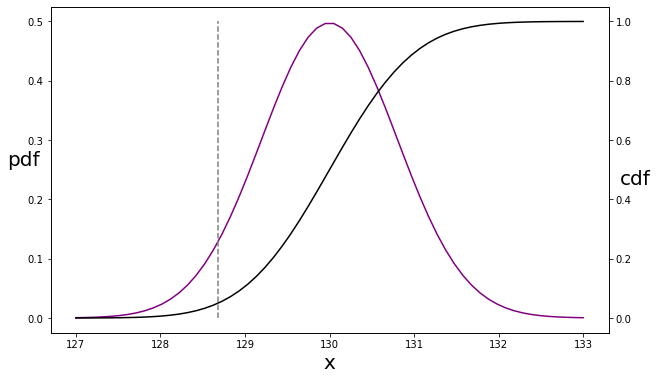

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# x축: 양옆에 표준편차를 빼고 더해준 값으로 구간 설정
xs = np.linspace(127,133,60)

ax1.plot(xs,rv.pdf(xs), color = 'purple')  # 확률밀도함수
ax2.plot(xs,rv.cdf(xs), color = 'black')   # 누적분포함수

ax1.vlines(rv.ppf(0.05), 0, 0.5, color='gray',ls = '--')  # rv.ppf(0.05): 누적분포가 0.05인 확률변수값 = 임곗값

ax1.set_xlabel("x", fontsize = 20)
ax1.set_ylabel('pdf', rotation = 0, fontsize = 20)
ax2.set_ylabel('cdf', rotation = 0, fontsize = 20) 
ax1.set_ylim

plt.show()

In [34]:
# 검정통계량 z: 표본평균을 표준화한 값
z = (s_mean - 130) / np.sqrt(9/14)
print(f'검정통계량: {z:.3f}')

# 임곗값
rv = stats.norm()
print(f'임곗값: {rv.isf(0.95):.3f}, {rv.ppf(0.05):.3f}')

# 검정
print(f'임계값 > z값이므로 귀무가설은 기각한다.')

검정통계량: -1.932
임곗값: -1.645, -1.645
임계값 > z값이므로 귀무가설은 기각한다.


In [46]:
# p값 산출
p = rv.cdf(z)
print(f'p값: {p}')

# 검정
print(f'유의수준 > p값이므로 귀무가설은 기각한다.')

p값: 0.026661319523126635
유의수준 > p값이므로 귀무가설은 기각한다.


### 단측검정과 양측검정
귀무가설 : 감자튀김의 무게는 130g이다.
- 단측검정 : 감자튀김의 무게가 130g보다 <b>작다/크다</b>를 대립가설로 수행
- 양측검정 : 감자튀김의 무게는 130g이 <b>아니다</b>를 대립가설로 수행


In [47]:
# 검정통계량
z = (s_mean - 130) / np.sqrt(9/14)
print(f'검정통계량: {z:.3f}')

# 임곗값
rv = stats.norm()
print(f'양측검정 임곗값: {rv.interval(0.95)}')

# 검정
print(f'임계값 < z값이므로 귀무가설은 채택한다.')

검정통계량: -1.932
양측검정 임곗값: (-1.959963984540054, 1.959963984540054)
임계값 < z값이므로 귀무가설은 채택한다.


In [48]:
# 양측검정의 p값 
## 상단과 하단의 양쪽 면적을 고려해야 하므로, 누적밀도함수의 2배로 함
p = rv.cdf(z) *2
print(f'양측검정 p값: {p:.3f}')

# 검정
print(f'유의수준 < p값이므로 귀무가설은 채택한다.')

양측검정 p값: 0.053
유의수준 < p값이므로 귀무가설은 채택한다.


#### 가설검정에서의 두 가지 오류
- 제1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - 유의수준은 연구자가 지정하는 부분이기 때문에 제어가 가능한 부분임
  - '실제로 평균이 130g'인데도 평균은 130g 보다 작다라는 결론을 내리는 상황 
  
- 제2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - '모평균은 130g 보다 작다'인데도 모평균은 130g 보다 작다라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제1종 오류는 제어할 수 있지만 제2종 오류는 제어할 수 없는 비대칭성이 있다.


In [49]:
# 실제 평균 130g인 상황 고려 N(130,9)

rv = stats.norm(130,3)

In [55]:
# 제 1종 오류를 범할 비율
## '평균이 130g'인데도 '평균이 130g보다 작다'라는 결론을 내려버리는 비율

# 임곗값 구하기
c = stats.norm().isf(0.95)
print(f'임곗값: {c:.3f}')


# 14개의 표본을 추출하여 가설검정 수행작업 10000번 시행
cnt = 0
for _ in range(10000):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    
    if z < c :
        cnt += 1

cnt / 10000

임곗값: -1.645


0.047

제 1종 오류를 범한 비율이 0.047이 나옴. 대략 5%비율로 '130g보다 작다.'라고 잘못 탐지함

In [56]:
# 실제 평균 128g인 상황 고려 N(128,9)

rv = stats.norm(128,3)

In [57]:
# 제 2종 오류를 범할 비율
## '모평균은 130g보다 작다'인데도 '모펴균은 130g'보다 작다 라는 결론을 얻을 수 없는 상황

# 임곗값 구하기
c = stats.norm().isf(0.95)
print(f'임곗값: {c:.3f}')

# 14개의 표본을 추출하여 가설검정 수행작업 10000번 시행
cnt = 0
for _ in range(10000):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c :
        cnt += 1

cnt / 10000

임곗값: -1.645


0.195

### 기본적인 가설검정

#### 정규분포의 모평균에 대한 검정: 모분산을 알고 있는 경우

H0: μ = μ0

H1: μ != μ0

In [109]:
def pmean_test(sample, mean0, p_var, alpha = 0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1 - alpha)
    
    z = (s_mean - mean0) / np.sqrt(p_var/n)
    
    if interval[0] <= z <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
        
    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z) * 2)
    print(f'p값은 {p:.3f}')      

In [111]:
# H0: μ = 130 , H1: μ != 130
# 감자 무게의 평균은 130이다, 아니다

df = pd.read_csv('ch11_potato.csv')
sample = np.array(df['무게'])

pmean_test(sample, 130, 9)

귀무가설 채택
p값은  0.053


#### 정규분포의 모분산에 대한 검정

H0: σ2 = σ20

H1: σ2 != σ20

In [123]:
def pvar_test(sample, var0, alpha = 0.05):
    u_var = np.var(sample, ddof = 1)    # 표본의 불편분산
    n = len(sample)
    rv = stats.chi2(df = n-1)   
    
    interval = rv.interval(1 - alpha)
    
    y = (n - 1) * u_var / var0
    
    if interval[0] <= y <= interval[1] :
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
    

    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [124]:
# H0: σ2 = σ20, H1: σ2 != σ20

df = pd.read_csv('ch11_potato.csv')
sample = np.array(df['무게'])

pvar_test(sample, 9)

귀무가설 채택
p값은 0.085


#### 정규분포의 모평균에 대한 검정: 모분산을 모르고 있는 경우  -> 1표본 t검정

H0: μ = μ0

H1: μ != μ0

<b>사용자함수 생성 후 직접 구하기</b> 

In [127]:
def pmean_test(sample, mean0, alpha = 0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof = 1)
    n = len(sample)
    
    rv = stats.t(df = n - 1)
    interval = rv.interval(1 - alpha)
    
    t = (s_mean - mean0) / np.sqrt(u_var/n)
    
    if interval[0] <= t <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
        
    if t < 0 :
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [128]:
pmean_test(sample, 130)

귀무가설 채택
p값은 0.169


<b>stats의 ttest_1samp 메서드 활용</b>

In [131]:
t, p = stats.ttest_1samp(sample, 130)

print(f't 검정통계량: {t: .3f}')
print(f'p값: {p:.3f}')

t 검정통계량: -1.455
p값: 0.169


### 2표본 문제에 관한 가설검정

#### 대응비교 t검정
- 대응표본은 두 데이터에서 서로 대응하는 동일한 개체에 대해 각각 다른 조건(반응 전, 반응 후)으로 측정한 것

예시)친구 20명에게 1주일간 근력운동을 하게하고, 운동 전후에 집중력을 측정하는 테스트를 받게 함. 집중력 테스트에 유의한 차이가 있는가?

H0: μ1 - μ2 = 0

H1: μ1 - μ2 != 0

      또는
      
H0: μd = 0

H1: μd != 0

In [148]:
df = pd.read_csv('ch11_training_rel.csv')
df

,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84
5,45,37
6,55,60
7,49,52
8,49,68
9,52,70


In [149]:
df['차이'] = df['후'] - df['전']
df.head()

,전,후,차이
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25


In [150]:
t, p = stats.ttest_1samp(df['차이'], 0)

print(f't 검정통계량: {t:.3f}')
print(f'p값: {p:.3f}')
print(f'{p:.3f}값이 유의수준 0.05보다 작기 때문에 귀무가설을 기각함.\n근력운동은 집중력 테스트에 유의한 차이를 보임')

t 검정통계량: 2.204
p값: 0.040
0.040값이 유의수준 0.05보다 작기 때문에 귀무가설을 기각함.
근력운동은 집중력 테스트에 유의한 차이를 보임


#### 독립비교 t검정
- 대응하는 데이터가 없고 독립된 2표본 모집단에 정규분포를 가정할 수 있는 경우 평균값의 차이에 대한 검정

예시) 근력운동이 집중력을 향상시키는 효과가 유의한지, 근력운동을 시킨 자신의 학급 20명과 다른 반 학급 20명 사이에서 확인해보기

H0: μ1 - μ2 = 0

H1: μ1 - μ2 != 0

In [153]:
df = pd.read_csv('ch11_training_ind.csv')
df.head()

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [157]:
t, p = stats.ttest_ind(df['A'], df['B'], equal_var = False)  #equal_val = False: 웰치의 방법

print(f't 검정통계량: {t:.3f}')
print(f'p값: {p:.3f}')
print(f'p값이 0.05보다 크므로 귀무가설을 채택함. \n따라서, 근력운동 시 두 집단의 집중력에 유의한 차이가 없음을 알 수 있음')

t 검정통계량: -1.761
p값: 0.087
p값이 0.05보다 크므로 귀무가설을 채택함. 
따라서, 근력운동 시 두 집단의 집중력에 유의한 차이가 없음을 알 수 있음


#### 카이제곱검정
- 독립성 검정
    - 귀무가설: 두 변수 'X,Y에 관해서 X와 Y가 독립이다.'
    - 대립가설: 'X,Y에 관해서 X와 Y가 독립이 아니다.'
- 독립성 검정에 카이제곱분포가 사용되기 때문에 카이제곱검정이라고도 부른다.
 
  예시)광고A와 광고B간의 구입 비율에 유의한 차이가 있는지 확인하는 경우 사용할 수 있음.

In [60]:
ad_df = pd.read_csv('ch11_ad.csv')
ad_df

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다
...,...,...
995,B,하지 않았다
996,B,하지 않았다
997,B,하지 않았다
998,B,하지 않았다


<b>직접 구해보기 </b>

In [61]:
# 교차집계표 작성

ad_cross = pd.crosstab(ad_df['광고'], ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [63]:
# 구입비율 알아보기

ad_cross['했다'] / (ad_cross['했다'] + ad_cross['하지 않았다'])

광고
A    0.1225
B    0.0850
dtype: float64

A의 구입비율이 더 높게 나타남

In [81]:
# 구입여부에 대한 빈도수 계산

n_not, n_yes = ad_cross.sum()
print(f'구임안함: {n_not}')
print(f'구입함: {n_yes}')



# A광고, B광고를 본 빈도수

n_adA, n_adB = ad_cross.sum(axis = 1)
print(f'A광고를 본 사람 수: {n_adA}')
print(f'B광고를 본 사람 수: {n_adB}')

구임안함: 900
구입함: 100
A광고를 본 사람 수: 400
B광고를 본 사람 수: 600


In [89]:
# 기대도수 구하기

n = 1000
ad_ef = pd.DataFrame({'했다' : [n_adA * n_yes / n,
                                n_adB * n_yes / n],
                     '하지 않았다' : [n_adA * n_not / n,
                                     n_adB * n_not / n]},
                    index = ['A', 'B'])

ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


- 귀무가설: 광고종류와 상품구입유무는 독립이 아니다.
- 대립가설: 광고종류와 상품구입유무는 독립이다.

In [100]:
# 카이제곱 검정(관측도수 - 기대도수)^2/기대도수

y = ((ad_cross - ad_ef)**2 / ad_ef).sum().sum()
print(f'검정통계량: {y}')



# 카이제곱분포 객체화 X~ X^2(n-1)*(m-1)

rv = stats.chi2(1)
print(f'p값: {1 - rv.cdf(y):.3f}', '\n')



print(f'p값은 유의수준 0.05보다 크므로 귀무가설을 채택한다.\n따라서, 광고종류와 상품구입유무는 독립이 아님을 알 수 있다.')

검정통계량: 3.75
p값: 0.053 

p값은 유의수준 0.05보다 크므로 귀무가설을 채택한다.
따라서, 광고종류와 상품구입유무는 독립이 아님을 알 수 있다.


<b>stats 메서드 활용</b>

In [108]:
# 검정통계량, p값, 자유도, 기대도수

chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction = False)

print(f'검정통계량: {chi2}, \np값: {p: .3f},\n자유도: {dof},\n기대도수:\n {ef}')

검정통계량: 3.75, 
p값:  0.053,
자유도: 1,
기대도수:
 [[360.  40.]
 [540.  60.]]


#### 과제: 카이제곱 검정
카이제곱 검정을 이용하여 독립성 검정을 수행하는 사례 작성하여 설명하기

H0: 영화장르와 간식구매여부는 독립이다.

H1: 영화장르와 간식구매여부는 독립이 아니다.

In [158]:
import pandas as pd

# 관측도수 데이터프레임 만들기
df_o = pd.DataFrame({'간식류':[50, 125, 90, 45],
                     '간식류 비구매': [75, 175, 30, 10]},
                     index = ['작업', '코미디', '가족', '공포'])
df_o

,간식류,간식류 비구매
작업,50,75
코미디,125,175
가족,90,30
공포,45,10


In [162]:
# 간식류 구매여부별 합계 구하기
snack = df_o.sum()
display(snack)


# 영화 장르별 합계 구하기
movie = df_o.sum(axis = 1)
display(movie)

간식류        310
간식류 비구매    290
dtype: int64

작업     125
코미디    300
가족     120
공포      55
dtype: int64

In [189]:
# 기대도수 차트 만들기

chi_square, p, df, df_e =  stats.chi2_contingency(df_o, correction = True)

df_e = pd.DataFrame(df_e, columns = df_o.columns, index = df_o.index).round(2)

print(f'기대도수:')
display(df_e)

print(f'카이제곱 검정량: {chi_square:.3f}','\n')


print(f'p값: {p:.3f}','\n')
print('p값이 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.\n따라서, 영화장르와 간식구매여부는 독립이 아님을 알 수 있다.')

기대도수:


,간식류,간식류 비구매
작업,64.58,60.42
코미디,155.00,145.00
가족,62.00,58.00
공포,28.42,26.58


카이제곱 검정량: 65.012 

p값: 0.000 

p값이 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다.
따라서, 영화장르와 간식구매여부는 독립이 아님을 알 수 있다.
